In [1]:
import pandas as pd
import numpy as np
import calculate as calc
import plot as plo

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from plot import get_cohort_careerage_df

In [2]:
authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-1-year.csv')
#authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-10-year.csv')
authorStartEndCareerData.head(n=20)

,author,start_year,end_year,num_pub,career_length,max_absence,avg_absence,dropped_after_10,gender
0,'maseka lesaoana,2001,2015,2,15,14,7.500000,True,none
1,(max) zong-ming cheng,2009,2011,2,3,13,7.500000,True,none
2,(zhou) bryan bai,2011,2012,2,2,14,7.500000,True,none
3,a aart blokhuis,1992,2005,2,14,13,7.500000,True,none
4,a ahrabian,2017,2017,1,1,15,15.000000,True,none
5,a el sharkawi,2002,2002,1,1,15,15.000000,True,none
6,a kopec,2003,2003,1,1,15,15.000000,True,none
7,a lun,2010,2010,1,1,15,15.000000,True,none
8,a mete,2008,2008,1,1,15,15.000000,True,none
9,a min tjoa,1979,2017,191,39,7,1.000000,False,none


In [5]:
END_YEAR = 2018
MAX_CAREER_LENGTH_COHORT = 15

years = authorStartEndCareerData['start_year'].unique()
years = sorted(years)
cohort_start_years = [y for y in years if y < (END_YEAR - MAX_CAREER_LENGTH_COHORT)]

In [6]:
import scipy.stats as stats

average_absence_cohort = authorStartEndCareerData.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_f = authorStartEndCareerData[authorStartEndCareerData["gender"]=="f"]
average_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_m = authorStartEndCareerData[authorStartEndCareerData["gender"]=="m"]
average_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_n = authorStartEndCareerData[authorStartEndCareerData["gender"]=="none"]
average_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]


/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Average waiting time analysis over cohorts

In [7]:
## We expect to see that average waiting times are decreasing over time since scientists recently form larger collaborations

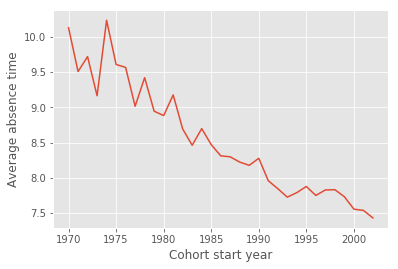

start_year
1970    0.148499
1971    0.132040
1972    0.117029
1973    0.112325
1974    0.094720
1975    0.107018
1976    0.093925
1977    0.101045
1978    0.096800
1979    0.092003
1980    0.089608
1981    0.083083
1982    0.079437
1983    0.074908
1984    0.066795
1985    0.067309
1986    0.060725
1987    0.057217
1988    0.050115
1989    0.048058
1990    0.044202
1991    0.041409
1992    0.039372
1993    0.035836
1994    0.033834
1995    0.032973
1996    0.031871
1997    0.030338
1998    0.028597
1999    0.027552
2000    0.025830
2001    0.024429
2002    0.023017
Name: max_absence, dtype: float64


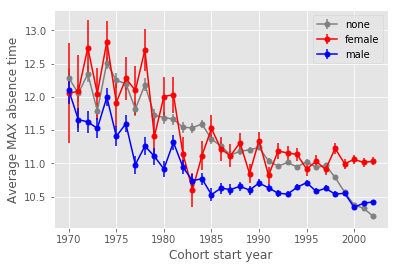

In [8]:
x = average_absence_cohort.index
y = average_absence_cohort.values
plt.plot(x,y)
plt.xlabel('Cohort start year')
plt.ylabel("Average absence time")
plt.show()


# print(std_max_absence_cohort)

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1) #, axisbg="white"
x = average_max_absence_cohort.index
y = average_max_absence_cohort.values
x_f = average_max_absence_cohort_f.index
y_f = average_max_absence_cohort_f.values
x_m = average_max_absence_cohort_m.index
y_m = average_max_absence_cohort_m.values
x_n = average_max_absence_cohort_n.index
y_n = average_max_absence_cohort_n.values

#plt.plot(x,y)
ax.errorbar(x_n, y_n,  yerr=std_max_absence_cohort.values, marker='.', markersize=10, color="grey", label="none")
ax.errorbar(x_f, y_f,  yerr=std_max_absence_cohort_f.values, marker='.', markersize=10, color="red", label="female")
ax.errorbar(x_m, y_m,  yerr=std_max_absence_cohort_m.values, marker='.', markersize=10, color="blue", label="male")

plt.xlabel('Cohort start year')
plt.ylabel("Average MAX absence time")
plt.legend()
plt.show()


In [9]:
# unique_career_ages = np.unique(data["age"])
# max_years = np.max(unique_career_ages)
# cols = 5   
# nrows = int(math.ceil(float(max_years)/float(cols)))

In [10]:
# fig2, ax2 = plt.subplots(nrows=nrows, ncols=cols, sharex=True, sharey=True, figsize=(16,10))

In [11]:
# p = get_cohort_careerage_df(cohort_start_years, 15, 'avg_absence', authorStartEndCareerData)

## Dropouts

In [12]:
inactive = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].sum()

In [13]:
total = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].count()

In [14]:
inactive = inactive.to_frame()
inactive['all'] = total

In [15]:
inactive.head()

dropped_after_10  all
start_year gender                       
1970       f                   25.0   35
           m                  304.0  416
           none               242.0  312
1971       f                   46.0   61
           m                  359.0  529

In [16]:
inactive['percent_dropped'] = (inactive['dropped_after_10']*100)/inactive['all']

In [17]:
inactive = inactive.loc[cohort_start_years]

In [18]:
inactive.reset_index(inplace=True)

In [19]:
data_m = inactive[inactive['gender']=='m']
data_f = inactive[inactive['gender']=='f']
data_n = inactive[inactive['gender']=='none']

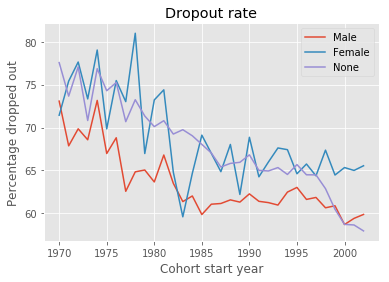

In [20]:
plt.plot(data_m['start_year'], data_m['percent_dropped'], label='Male')
plt.plot(data_f['start_year'], data_f['percent_dropped'], label='Female')
plt.plot(data_n['start_year'], data_n['percent_dropped'], label='None')
plt.title("Dropout rate")
plt.ylabel('Percentage dropped out')
plt.xlabel('Cohort start year')
plt.legend()
plt.show()

## Cliffs delta analysis

In [21]:
male = authorStartEndCareerData[authorStartEndCareerData.gender == 'm'].max_absence

In [22]:
female = authorStartEndCareerData[authorStartEndCareerData.gender == 'f'].max_absence

In [23]:
print(male.shape)
print(female.shape)

(793766,)
(255500,)


In [24]:
# over whole dataset
# do not run, compute heavy
# calc.cliffsD(male, female)
# -0.056557295548457606

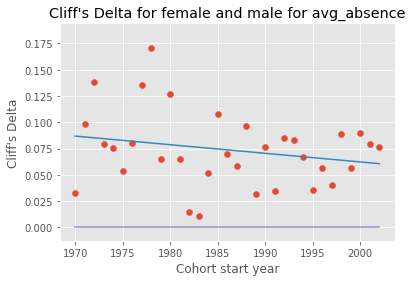

In [30]:
cd11 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'avg_absence', cohort_start_years)
plo.plot_cliffs_delta(cd11, 'female', 'male', 'avg_absence')

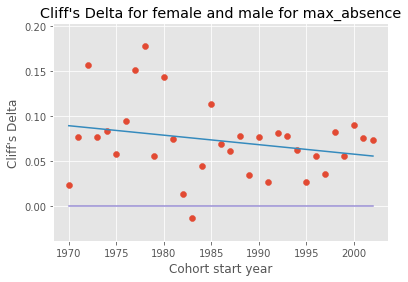

In [27]:
cd2 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd2, 'female', 'male', 'max_absence')

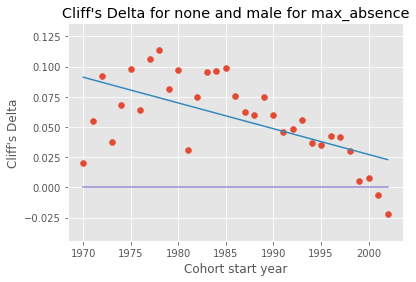

In [31]:
cd3 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'none', 'm', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd3, 'none', 'male', 'max_absence')

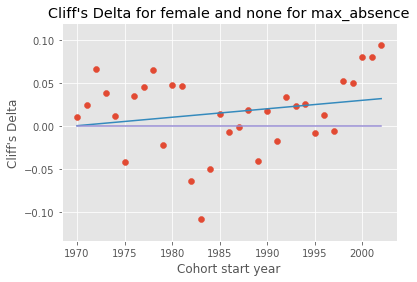

In [29]:
cd4 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'none', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd4, 'female', 'none', 'max_absence')